Face Detection with Haar Cascades
- face detection Not face recognition. We are only detecting if a face is in an image.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [2]:
kalpana = cv2.imread('Kalpana_Chawla.jpg')
kalpana = cv2.cvtColor(kalpana, cv2.COLOR_BGR2GRAY)
rohit = cv2.imread('Rohit-Sharma.jpg')
rohit = cv2.cvtColor(rohit, cv2.COLOR_BGR2GRAY)
teams = cv2.imread('indian_teams.webp')
teams = cv2.cvtColor(teams, cv2.COLOR_BGR2GRAY)

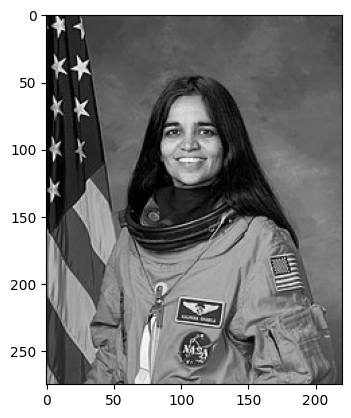

In [3]:
plt.imshow(kalpana, cmap='gray')

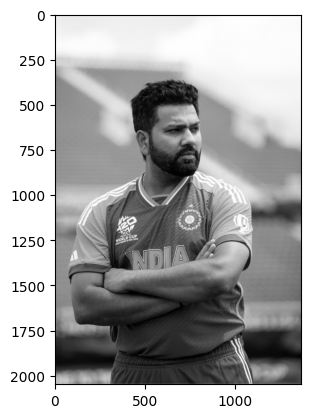

In [4]:
plt.imshow(rohit, cmap='gray')

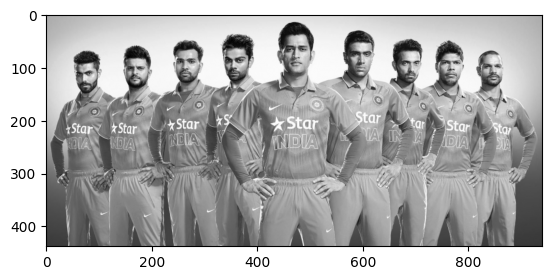

In [5]:
plt.imshow(teams, cmap='gray')

Cascade File

In [6]:
# Face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [26]:
face_cascade.detectMultiScale(rohit)

array([[ 559,  516,  326,  326],
       [ 706, 1040,   94,   94],
       [1021, 1150,   71,   71]], dtype=int32)

In [7]:
def detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

In [8]:
result = detect_face(rohit)

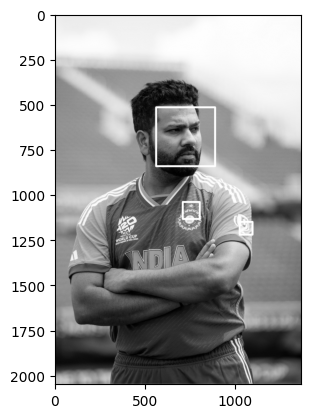

In [9]:
plt.imshow(result, cmap='gray')

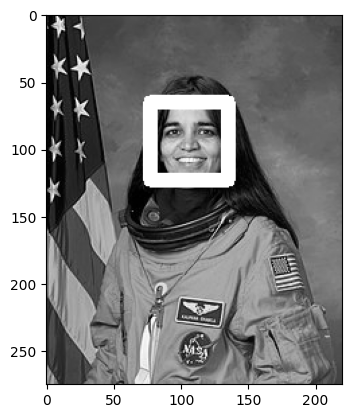

In [23]:
result = detect_face(kalpana)
plt.imshow(result, cmap='gray')

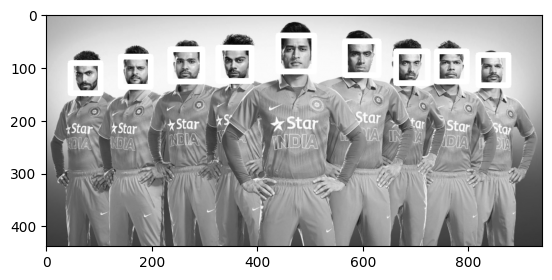

In [11]:
# Get errors 
result = detect_face(teams)
plt.imshow(result, cmap='gray')

In [12]:
def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x,y, w, h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

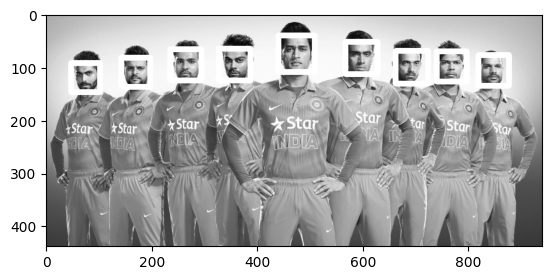

In [13]:
# Doesn't datect the side face.
result = adj_detect_face(teams)
plt.imshow(result, cmap='gray')

Eye Casecade File 

In [14]:
eye_casecade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [15]:
def detect_eyes(img):

    face_img = img.copy()

    eyes = eye_casecade.detectMultiScale(face_img)

    for (x,y,w,h) in eyes:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
    
    return face_img

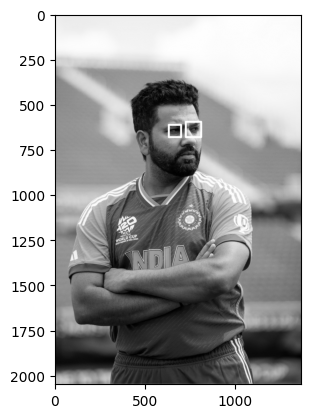

In [16]:
result = detect_eyes(rohit)
plt.imshow(result, cmap='gray')

In [ ]:
#eyes = eye_casecade.detectMultiScale(kalpana)

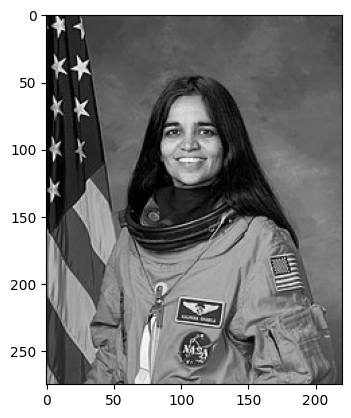

In [19]:
result = detect_eyes(kalpana)
plt.imshow(result, cmap='gray')

In [29]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

In [22]:
# Done